# 🎯 Notebook 6: Overfitting - Cuando el Modelo Aprende Demasiado

## 📚 ¿Qué aprenderás?
- Comprender el concepto de overfitting (sobreajuste)
- Identificar cuándo un modelo está sobreajustado
- Aplicar técnicas para prevenir el overfitting
- Implementar regularización L2 (Ridge)

## ⏱️ Tiempo estimado: 90 minutos

---

## 📦 Importación de Librerías

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## 🎭 1. ¿Qué es el Overfitting?

El **overfitting** ocurre cuando un modelo aprende tan bien los datos de entrenamiento que memoriza incluso el ruido, perdiendo la capacidad de generalizar a nuevos datos.

### Analogía:
Imagina un estudiante que memoriza todas las respuestas de exámenes anteriores palabra por palabra, pero no entiende los conceptos. En un examen nuevo, con preguntas diferentes, no sabrá responder.

### Características del Overfitting:
- ✅ Excelente rendimiento en datos de entrenamiento
- ❌ Mal rendimiento en datos de prueba
- 📈 El modelo es demasiado complejo para los datos

## 📊 2. Ejemplo Visual de Overfitting

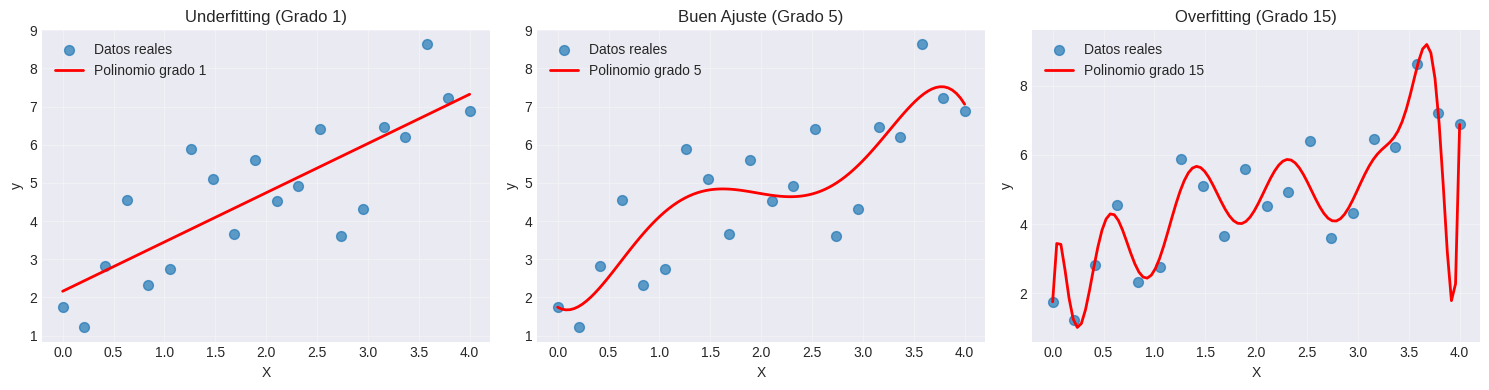

In [13]:
# Generar datos sintéticos con ruido
np.random.seed(42)
X = np.linspace(0, 4, 20)
y_real = 2 * X + 1 + np.random.normal(0, 1.5, X.shape)

# Crear tres modelos con diferentes complejidades
X_plot = np.linspace(0, 4, 100).reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
grados = [1, 5, 15]
modelos = ['Underfitting', 'Buen Ajuste', 'Overfitting']

for ax, grado, titulo in zip(axes, grados, modelos):
    # Transformar características
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X_reshaped)
    X_plot_poly = poly.transform(X_plot)

    # Entrenar modelo
    model = LinearRegression()
    model.fit(X_poly, y_real)
    y_pred = model.predict(X_plot_poly)

    # Visualizar
    ax.scatter(X, y_real, alpha=0.7, s=50, label='Datos reales')
    ax.plot(X_plot, y_pred, 'r-', linewidth=2, label=f'Polinomio grado {grado}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'{titulo} (Grado {grado})')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🤔 ¿Qué observamos?

1. **Grado 1 (Underfitting)**: Modelo muy simple, no captura la complejidad de los datos
2. **Grado 5 (Buen Ajuste)**: Balance entre simplicidad y complejidad
3. **Grado 15 (Overfitting)**: Modelo extremadamente complejo que memoriza cada punto

## 🔬 3. Detectando Overfitting con Train/Test Split

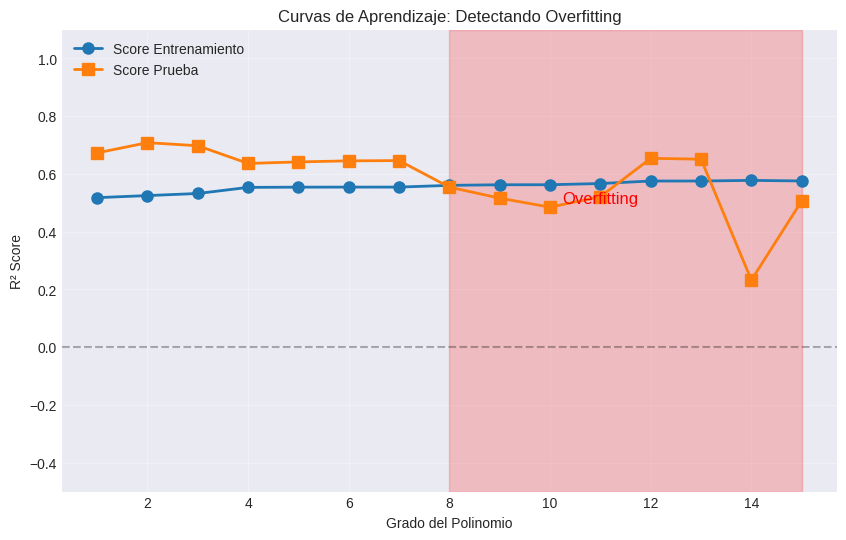

In [14]:
# Generar más datos para un experimento completo
np.random.seed(42)
n_samples = 100
X_full = np.random.uniform(0, 4, n_samples)
y_full = 2 * X_full + 1 + np.random.normal(0, 2, n_samples)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_full.reshape(-1, 1), y_full, test_size=0.3, random_state=42
)

# Evaluar modelos con diferentes grados
grados = range(1, 16)
train_scores = []
test_scores = []

for grado in grados:
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=grado)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Entrenar modelo
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calcular R² para train y test
    train_score = model.score(X_train_poly, y_train)
    test_score = model.score(X_test_poly, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Visualizar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(grados, train_scores, 'o-', label='Score Entrenamiento', linewidth=2, markersize=8)
plt.plot(grados, test_scores, 's-', label='Score Prueba', linewidth=2, markersize=8)
plt.xlabel('Grado del Polinomio')
plt.ylabel('R² Score')
plt.title('Curvas de Aprendizaje: Detectando Overfitting')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.ylim([-0.5, 1.1])

# Marcar zona de overfitting
plt.axvspan(8, 15, alpha=0.2, color='red', label='Zona de Overfitting')
plt.text(11, 0.5, 'Overfitting', fontsize=12, ha='center', color='red')

plt.show()

### 📈 Interpretación:
- **Score de entrenamiento alto + Score de prueba bajo = OVERFITTING**
- El modelo óptimo está donde el score de prueba es máximo
- A partir del grado 8-9, el modelo empieza a memorizar los datos

## 💪 Ejercicio 1: Identificando Overfitting

Completa el código para crear una función que detecte automáticamente si hay overfitting:

In [15]:
# 💡 PISTA GLOBAL: Necesitas implementar una función que tome los scores de entrenamiento y prueba,
# calcule la diferencia entre ellos, y determine si hay overfitting basándose en un umbral.
# Usa operaciones aritméticas básicas y condicionales para la lógica de detección.

def detectar_overfitting(train_score, test_score, umbral=0.1):
    """
    Detecta si hay overfitting comparando scores de train y test.
    """
    # Calcular la diferencia entre train y test score
    diferencia = train_score - test_score

    # Determinar si hay overfitting
    hay_overfitting = diferencia > umbral

    # Calcular el porcentaje de diferencia (evitar división por cero)
    porcentaje_diferencia = (diferencia / train_score) * 100 if train_score != 0 else 0

    # Crear diagnóstico
    if hay_overfitting:
        diagnostico = "⚠️ OVERFITTING DETECTADO"
    elif diferencia >= 0:
        diagnostico = "🎯 Modelo bien ajustado"
    else:
        diagnostico = "❓ Posible underfitting"

    return {
        'diagnostico': diagnostico,
        'train_score': train_score,
        'test_score': test_score,
        'diferencia': diferencia,
        'porcentaje_diferencia': porcentaje_diferencia,
        'hay_overfitting': hay_overfitting
    }

# Probar la función con diferentes grados
# (Asegúrate de haber ejecutado las celdas anteriores que definen X_train, etc.)
for grado in [1, 5, 12]:
    poly = PolynomialFeatures(degree=grado)
    # fit_transform en train, solo transform en test
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_score = model.score(X_train_poly, y_train)
    test_score = model.score(X_test_poly, y_test)

    resultado = detectar_overfitting(train_score, test_score)
    print(f"\nGrado {grado}:")
    print(f"  {resultado['diagnostico']}")
    print(f"  Train R²: {resultado['train_score']:.3f}")
    print(f"  Test R²: {resultado['test_score']:.3f}")
    print(f"  Diferencia: {resultado['porcentaje_diferencia']:.1f}%")


Grado 1:
  ❓ Posible underfitting
  Train R²: 0.518
  Test R²: 0.673
  Diferencia: -29.9%

Grado 5:
  ❓ Posible underfitting
  Train R²: 0.554
  Test R²: 0.642
  Diferencia: -15.8%

Grado 12:
  ❓ Posible underfitting
  Train R²: 0.576
  Test R²: 0.654
  Diferencia: -13.6%


## 🛡️ 4. Regularización: La Solución al Overfitting

La **regularización** añade una penalización al modelo para evitar que los coeficientes crezcan demasiado.

### Regularización L2 (Ridge):
$$\text{Costo} = \text{MSE} + \alpha \sum_{i=1}^{n} w_i^2$$

Donde:
- $\alpha$ (alpha) controla la fuerza de la regularización
- $w_i$ son los coeficientes del modelo


📊 Comparación de Modelos (Grado 12):
                    Modelo  Train R²  Test R²  Diferencia  Overfitting
        Sin Regularización  0.575542 0.654081   -0.078539        False
Con Regularización (Ridge)  0.560964 0.497083    0.063881        False


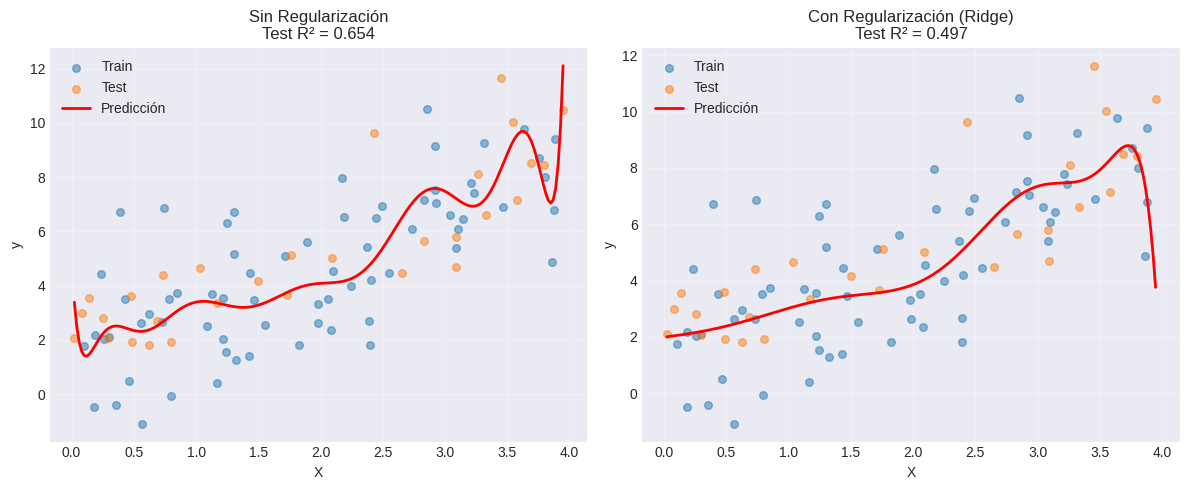

In [16]:
# Comparar modelo sin y con regularización
grado = 12  # Grado alto para provocar overfitting

# Preparar datos
poly = PolynomialFeatures(degree=grado)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modelo SIN regularización
modelo_sin = LinearRegression()
modelo_sin.fit(X_train_poly, y_train)

# Modelo CON regularización (Ridge)
modelo_con = Ridge(alpha=1.0)  # Alpha controla la regularización
modelo_con.fit(X_train_poly, y_train)

# Comparar resultados
resultados = pd.DataFrame({
    'Modelo': ['Sin Regularización', 'Con Regularización (Ridge)'],
    'Train R²': [
        modelo_sin.score(X_train_poly, y_train),
        modelo_con.score(X_train_poly, y_train)
    ],
    'Test R²': [
        modelo_sin.score(X_test_poly, y_test),
        modelo_con.score(X_test_poly, y_test)
    ]
})

resultados['Diferencia'] = resultados['Train R²'] - resultados['Test R²']
resultados['Overfitting'] = resultados['Diferencia'] > 0.1

print("\n📊 Comparación de Modelos (Grado 12):")
print(resultados.to_string(index=False))

# Visualizar predicciones
X_plot = np.linspace(X_full.min(), X_full.max(), 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.figure(figsize=(12, 5))

for i, (modelo, titulo) in enumerate([(modelo_sin, 'Sin Regularización'),
                                       (modelo_con, 'Con Regularización (Ridge)')]):
    plt.subplot(1, 2, i+1)
    plt.scatter(X_train, y_train, alpha=0.5, label='Train', s=30)
    plt.scatter(X_test, y_test, alpha=0.5, label='Test', s=30)
    plt.plot(X_plot, modelo.predict(X_plot_poly), 'r-', linewidth=2, label='Predicción')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'{titulo}\nTest R² = {modelo.score(X_test_poly, y_test):.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 💪 Ejercicio 2: Optimizando el Parámetro Alpha

Encuentra el mejor valor de alpha para Ridge Regression:

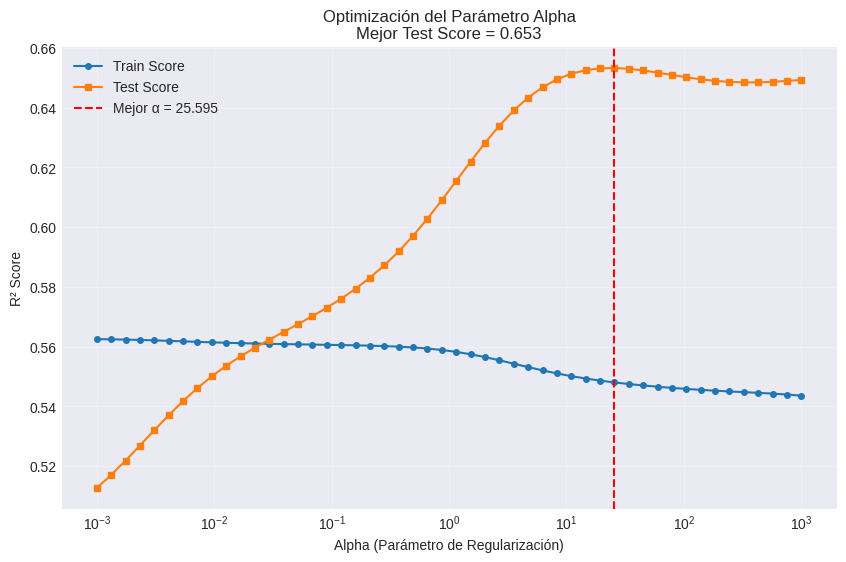


🎯 Alpha óptimo: 25.5955
📊 Test R² con alpha óptimo: 0.6533


In [17]:
# 💡 PISTA GLOBAL: Necesitas iterar sobre diferentes valores de alpha, entrenar un modelo Ridge
# para cada uno, calcular scores, y encontrar el óptimo. Usa numpy para generar los valores de alpha
# en escala logarítmica, y métodos de listas para encontrar el mejor.

# Generar valores de alpha en escala logarítmica
alphas = np.logspace(-3, 3, 50)
train_scores = []
test_scores = []

# Usar grado alto para necesitar regularización
grado = 10
poly = PolynomialFeatures(degree=grado)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Probar diferentes valores de alpha
for alpha in alphas:
    # Crear y entrenar modelo Ridge
    modelo = Ridge(alpha=alpha)
    modelo.fit(X_train_poly, y_train)

    # Calcular scores
    train_score = modelo.score(X_train_poly, y_train)
    test_score = modelo.score(X_test_poly, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Encontrar el alpha óptimo (máximo test score)
mejor_idx = test_scores.index(max(test_scores))
mejor_alpha = alphas[mejor_idx]
mejor_test_score = test_scores[mejor_idx]

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores, 'o-', label='Train Score', markersize=4)
plt.semilogx(alphas, test_scores, 's-', label='Test Score', markersize=4)
plt.axvline(x=mejor_alpha, color='red', linestyle='--', label=f'Mejor α = {mejor_alpha:.3f}')
plt.xlabel('Alpha (Parámetro de Regularización)')
plt.ylabel('R² Score')
plt.title(f'Optimización del Parámetro Alpha\nMejor Test Score = {mejor_test_score:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🎯 Alpha óptimo: {mejor_alpha:.4f}")
print(f"📊 Test R² con alpha óptimo: {mejor_test_score:.4f}")

## 💪 Ejercicio 3: Implementando Validación Cruzada

Crea una función completa para evaluar modelos con validación cruzada:


📊 Resultados de Validación Cruzada (5-fold):

Linear Regression (sin regularización):
  Scores por fold: ['0.457', '0.594', '0.538', '0.577', '0.233']
  Promedio: 0.480 ± 0.132

Ridge Regression (con regularización):
  Scores por fold: ['0.528', '0.344', '0.560', '0.506', '0.656']
  Promedio: 0.519 ± 0.101


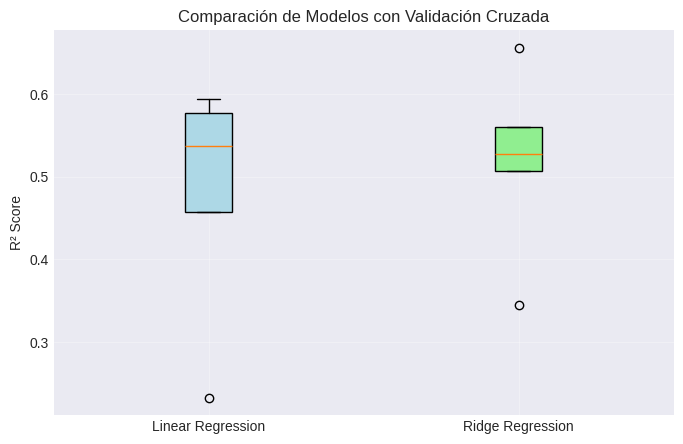

In [18]:
# 💡 PISTA GLOBAL: Implementa validación cruzada manual dividiendo los datos en k pliegues,
# entrenando en k-1 y validando en 1, rotando el pliegue de validación. Usa numpy para
# manipular arrays y sklearn para los modelos.

def validacion_cruzada_manual(X, y, modelo, k_folds=5):
    """
    Implementa validación cruzada desde cero.
    """
    n_samples = len(X)
    fold_size = n_samples // k_folds
    scores = []

    # Crear índices aleatorios
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    for fold in range(k_folds):
        # Definir índices de validación
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size if fold < k_folds - 1 else n_samples

        # Separar índices de train y validación
        val_indices = indices[val_start:val_end]
        train_indices = np.concatenate(
            [indices[:val_start], indices[val_end:]]
        )

        # Separar datos
        X_train_fold = X[train_indices]
        X_val_fold = X[val_indices]
        y_train_fold = y[train_indices]
        y_val_fold = y[val_indices]

        # Entrenar y evaluar
        modelo.fit(X_train_fold, y_train_fold)
        score = modelo.score(X_val_fold, y_val_fold)
        scores.append(score)

    return {
        'scores': scores,
        'promedio': np.mean(scores),
        'std': np.std(scores)
    }

# Probar con diferentes modelos
grado = 8
poly = PolynomialFeatures(degree=grado)
# (Asegúrate de tener X_full y y_full definidos de celdas anteriores)
X_poly = poly.fit_transform(X_full.reshape(-1, 1))

# Sin regularización
modelo_lr = LinearRegression()
cv_lr = validacion_cruzada_manual(X_poly, y_full, modelo_lr)

# Con regularización
modelo_ridge = Ridge(alpha=1.0)
cv_ridge = validacion_cruzada_manual(X_poly, y_full, modelo_ridge)

# Mostrar resultados
print("\n📊 Resultados de Validación Cruzada (5-fold):")
print("\nLinear Regression (sin regularización):")
print(f"  Scores por fold: {[f'{s:.3f}' for s in cv_lr['scores']]}")
print(f"  Promedio: {cv_lr['promedio']:.3f} ± {cv_lr['std']:.3f}")

print("\nRidge Regression (con regularización):")
print(f"  Scores por fold: {[f'{s:.3f}' for s in cv_ridge['scores']]}")
print(f"  Promedio: {cv_ridge['promedio']:.3f} ± {cv_ridge['std']:.3f}")

# Visualizar distribución de scores
fig, ax = plt.subplots(figsize=(8, 5))
positions = [1, 2]
bp = ax.boxplot([cv_lr['scores'], cv_ridge['scores']],
                positions=positions,
                labels=['Linear Regression', 'Ridge Regression'],
                patch_artist=True)

# Colorear las cajas
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('R² Score')
ax.set_title('Comparación de Modelos con Validación Cruzada')
ax.grid(True, alpha=0.3)
plt.show()

## 💪 Ejercicio 4: Construyendo un Pipeline Completo

Implementa una clase completa para detectar y prevenir overfitting:

✅ Mejor configuración encontrada:
   Grado: 3
   Alpha: 112.8838
   Test Score: 0.7226

📊 DIAGNÓSTICO DEL MODELO
Configuración:
  - Grado del polinomio: 3
  - Alpha (regularización): 112.8838

Rendimiento:
  - R² Entrenamiento: 0.5034
  - R² Prueba: 0.7226
  - Diferencia: -0.2192

✅ Estado: MODELO BIEN AJUSTADO
   El modelo generaliza correctamente


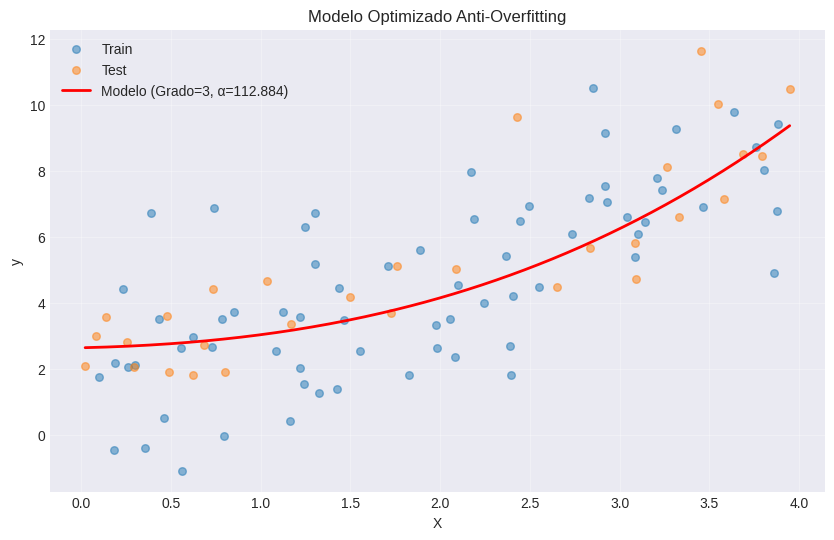

In [19]:
# 💡 PISTA GLOBAL: Crea una clase que encapsule todo el proceso: transformación polinomial,
# búsqueda del mejor alpha, entrenamiento, y evaluación. Usa métodos de clase y atributos
# para mantener el estado. Implementa métodos para fit, predict, y diagnóstico.

class ModeloAntiOverfitting:
    def __init__(self, max_grado=10, alphas=None):
        """
        Inicializa el modelo con prevención de overfitting.
        """
        self.max_grado = max_grado
        self.alphas = alphas if alphas is not None else np.logspace(-3, 3, 20)
        self.mejor_grado = None
        self.mejor_alpha = None
        self.poly = None
        self.modelo = None
        self.historial = {'grados': [], 'alphas': [], 'train_scores': [], 'test_scores': []}

    def buscar_mejor_configuracion(self, X_train, y_train, X_test, y_test):
        """
        Encuentra el mejor grado y alpha para minimizar overfitting.
        """
        mejor_score = -np.inf

        for grado in range(1, self.max_grado + 1):
            poly = PolynomialFeatures(degree=grado)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)

            for alpha in self.alphas:
                modelo = Ridge(alpha=alpha)
                modelo.fit(X_train_poly, y_train)
                train_score = modelo.score(X_train_poly, y_train)
                test_score = modelo.score(X_test_poly, y_test)

                self.historial['grados'].append(grado)
                self.historial['alphas'].append(alpha)
                self.historial['train_scores'].append(train_score)
                self.historial['test_scores'].append(test_score)

                if test_score > mejor_score:
                    mejor_score = test_score
                    self.mejor_grado = grado
                    self.mejor_alpha = alpha

        print(f"✅ Mejor configuración encontrada:")
        print(f"   Grado: {self.mejor_grado}")
        print(f"   Alpha: {self.mejor_alpha:.4f}")
        print(f"   Test Score: {mejor_score:.4f}")

    def fit(self, X_train, y_train):
        """
        Entrena el modelo con la mejor configuración.
        """
        self.poly = PolynomialFeatures(degree=self.mejor_grado)
        X_train_poly = self.poly.fit_transform(X_train)
        self.modelo = Ridge(alpha=self.mejor_alpha)
        self.modelo.fit(X_train_poly, y_train)
        return self

    def predict(self, X):
        """
        Realiza predicciones.
        """
        X_poly = self.poly.transform(X)
        return self.modelo.predict(X_poly)

    def score(self, X, y):
        """
        Calcula el R² score.
        """
        X_poly = self.poly.transform(X)
        return self.modelo.score(X_poly, y)

    def diagnosticar_overfitting(self, X_train, y_train, X_test, y_test):
        """
        Genera un diagnóstico completo del modelo.
        """
        train_score = self.score(X_train, y_train)
        test_score = self.score(X_test, y_test)
        diferencia = train_score - test_score

        print("\n" + "="*50)
        print("📊 DIAGNÓSTICO DEL MODELO")
        print("="*50)
        print(f"Configuración:")
        print(f"  - Grado del polinomio: {self.mejor_grado}")
        print(f"  - Alpha (regularización): {self.mejor_alpha:.4f}")
        print(f"\nRendimiento:")
        print(f"  - R² Entrenamiento: {train_score:.4f}")
        print(f"  - R² Prueba: {test_score:.4f}")
        print(f"  - Diferencia: {diferencia:.4f}")

        if diferencia > 0.1:
            print(f"\n⚠️ Estado: OVERFITTING DETECTADO")
            print(f"   Recomendación: Aumentar regularización o reducir complejidad")
        elif diferencia > 0.05:
            print(f"\n⚡ Estado: LIGERO OVERFITTING")
            print(f"   Recomendación: Monitorear con más datos")
        else:
            print(f"\n✅ Estado: MODELO BIEN AJUSTADO")
            print(f"   El modelo generaliza correctamente")
        print("="*50)

# Usar la clase
modelo_auto = ModeloAntiOverfitting(max_grado=12)
modelo_auto.buscar_mejor_configuracion(X_train, y_train, X_test, y_test)
modelo_auto.fit(X_train, y_train)
modelo_auto.diagnosticar_overfitting(X_train, y_train, X_test, y_test)

# Visualizar predicciones
X_plot = np.linspace(X_full.min(), X_full.max(), 200).reshape(-1, 1)
y_pred = modelo_auto.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='Train', s=30)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', s=30)
plt.plot(X_plot, y_pred, 'r-', linewidth=2,
         label=f'Modelo (Grado={modelo_auto.mejor_grado}, α={modelo_auto.mejor_alpha:.3f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo Optimizado Anti-Overfitting')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 💪 Ejercicio 5: Análisis Comparativo Completo

Implementa una función que compare múltiples técnicas anti-overfitting:


📊 COMPARACIÓN DE ESTRATEGIAS ANTI-OVERFITTING
        Estrategia  Train R²  Test R²  Train MAE  Test MAE  Diferencia R²  Overfitting  Ratio MAE
Grado Reducido (3)    0.5324   0.6977     1.4885    1.1487        -0.1653        False     0.7717
    Ridge (α=10.0)    0.5504   0.6508     1.4547    1.2370        -0.1004        False     0.8503
Grado Reducido (7)    0.5545   0.6463     1.4351    1.2789        -0.0918        False     0.8912
Grado Reducido (5)    0.5543   0.6417     1.4388    1.2950        -0.0874        False     0.9001
     Ridge (α=1.0)    0.5586   0.6123     1.4188    1.2801        -0.0537        False     0.9022
     Ridge (α=0.1)    0.5606   0.5740     1.4054    1.3248        -0.0134        False     0.9426
    Ridge (α=0.01)    0.5614   0.5507     1.4023    1.3472         0.0107        False     0.9607
Sin Regularización    0.5627   0.4850     1.4090    1.4436         0.0777        False     1.0246

🏆 MEJOR ESTRATEGIA:
   Grado Reducido (3)
   Test R²: 0.6977
   Overfi

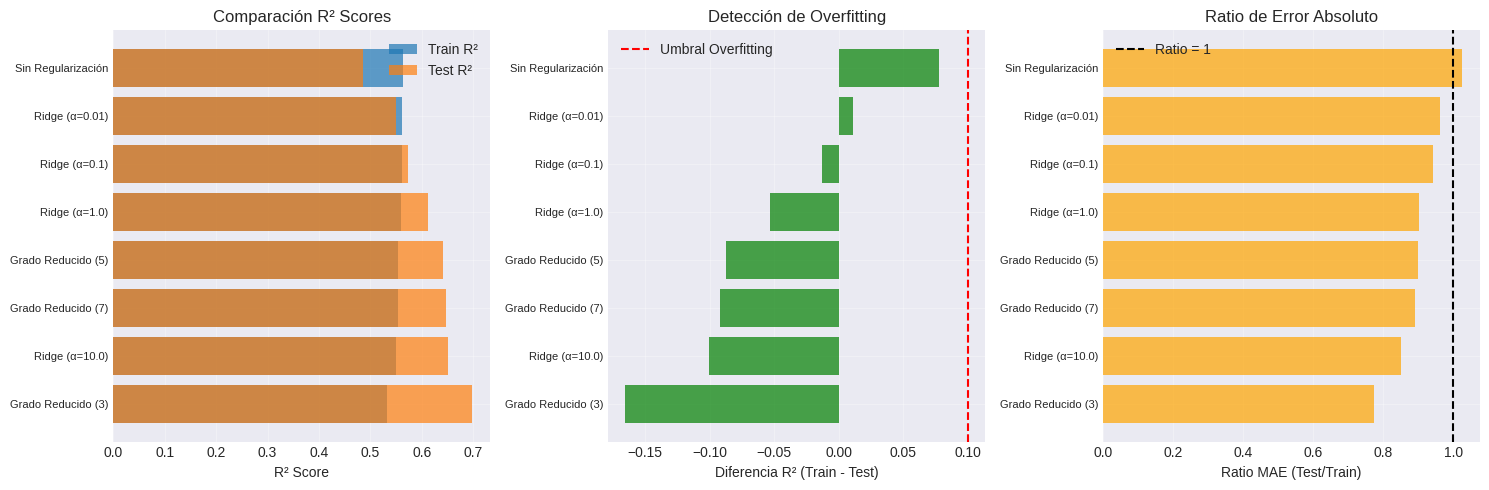

In [20]:
# 💡 PISTA GLOBAL: Crea funciones para comparar diferentes estrategias de prevención de overfitting.
# Usa diccionarios para almacenar resultados, listas para múltiples modelos, y pandas para
# organizar los resultados. Implementa métricas adicionales además de R².

from sklearn.metrics import mean_absolute_error

def comparar_estrategias_antioverfit(X_train, y_train, X_test, y_test, grado_base=10):
    """
    Compara diferentes estrategias para prevenir overfitting.
    """
    resultados = []

    poly = PolynomialFeatures(degree=grado_base)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 1. Modelo base
    modelo_base = LinearRegression()
    modelo_base.fit(X_train_poly, y_train)
    resultados.append({
        'Estrategia': 'Sin Regularización',
        'Train R²': modelo_base.score(X_train_poly, y_train),
        'Test R²': modelo_base.score(X_test_poly, y_test),
        'Train MAE': mean_absolute_error(y_train, modelo_base.predict(X_train_poly)),
        'Test MAE': mean_absolute_error(y_test, modelo_base.predict(X_test_poly))
    })

    # 2. Ridge
    for alpha in [0.01, 0.1, 1.0, 10.0]:
        modelo_ridge = Ridge(alpha=alpha)
        modelo_ridge.fit(X_train_poly, y_train)
        resultados.append({
            'Estrategia': f'Ridge (α={alpha})',
            'Train R²': modelo_ridge.score(X_train_poly, y_train),
            'Test R²': modelo_ridge.score(X_test_poly, y_test),
            'Train MAE': mean_absolute_error(y_train, modelo_ridge.predict(X_train_poly)),
            'Test MAE': mean_absolute_error(y_test, modelo_ridge.predict(X_test_poly))
        })

    # 3. Reducción de complejidad
    for grado_reducido in [3, 5, 7]:
        poly_red = PolynomialFeatures(degree=grado_reducido)
        X_train_red = poly_red.fit_transform(X_train)
        X_test_red = poly_red.transform(X_test)
        modelo_red = LinearRegression()
        modelo_red.fit(X_train_red, y_train)
        resultados.append({
            'Estrategia': f'Grado Reducido ({grado_reducido})',
            'Train R²': modelo_red.score(X_train_red, y_train),
            'Test R²': modelo_red.score(X_test_red, y_test),
            'Train MAE': mean_absolute_error(y_train, modelo_red.predict(X_train_red)),
            'Test MAE': mean_absolute_error(y_test, modelo_red.predict(X_test_red))
        })

    df_resultados = pd.DataFrame(resultados)
    df_resultados['Diferencia R²'] = df_resultados['Train R²'] - df_resultados['Test R²']
    df_resultados['Overfitting'] = df_resultados['Diferencia R²'] > 0.1
    df_resultados['Ratio MAE'] = df_resultados['Test MAE'] / df_resultados['Train MAE']
    return df_resultados.sort_values('Test R²', ascending=False)

# Ejecutar y mostrar
df_comparacion = comparar_estrategias_antioverfit(X_train, y_train, X_test, y_test)
print("\n📊 COMPARACIÓN DE ESTRATEGIAS ANTI-OVERFITTING")
print("="*80)
print(df_comparacion.to_string(index=False, float_format='%.4f'))

mejor_estrategia = df_comparacion.iloc[0]
print("\n🏆 MEJOR ESTRATEGIA:")
print(f"   {mejor_estrategia['Estrategia']}")
print(f"   Test R²: {mejor_estrategia['Test R²']:.4f}")
print(f"   Overfitting: {'Sí' if mejor_estrategia['Overfitting'] else 'No'}")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x_pos = np.arange(len(df_comparacion))
axes[0].barh(x_pos, df_comparacion['Train R²'], alpha=0.7, label='Train R²')
axes[0].barh(x_pos, df_comparacion['Test R²'], alpha=0.7, label='Test R²')
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels(df_comparacion['Estrategia'], fontsize=8)
axes[0].set_xlabel('R² Score')
axes[0].set_title('Comparación R² Scores')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

colors = ['red' if x else 'green' for x in df_comparacion['Overfitting']]
axes[1].barh(x_pos, df_comparacion['Diferencia R²'], color=colors, alpha=0.7)
axes[1].axvline(x=0.1, color='red', linestyle='--', label='Umbral Overfitting')
axes[1].set_yticks(x_pos)
axes[1].set_yticklabels(df_comparacion['Estrategia'], fontsize=8)
axes[1].set_xlabel('Diferencia R² (Train - Test)')
axes[1].set_title('Detección de Overfitting')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].barh(x_pos, df_comparacion['Ratio MAE'], alpha=0.7, color='orange')
axes[2].axvline(x=1.0, color='black', linestyle='--', label='Ratio = 1')
axes[2].set_yticks(x_pos)
axes[2].set_yticklabels(df_comparacion['Estrategia'], fontsize=8)
axes[2].set_xlabel('Ratio MAE (Test/Train)')
axes[2].set_title('Ratio de Error Absoluto')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 Resumen y Mejores Prácticas

### 🔑 Conceptos Clave Aprendidos:

1. **Overfitting**: Cuando el modelo memoriza los datos de entrenamiento
2. **Detección**: Comparar rendimiento en train vs test
3. **Prevención**:
   - Regularización (Ridge, Lasso)
   - Reducir complejidad del modelo
   - Más datos de entrenamiento
   - Validación cruzada

### ✅ Mejores Prácticas:

1. **Siempre dividir los datos** en train/test
2. **Monitorear ambos scores** (train y test)
3. **Usar validación cruzada** para evaluación robusta
4. **Comenzar simple** y aumentar complejidad gradualmente
5. **Regularizar** cuando sea necesario

### 🚫 Errores Comunes a Evitar:

1. Evaluar solo en datos de entrenamiento
2. Usar modelos demasiado complejos para datos simples
3. Ignorar la diferencia entre train y test score
4. No usar regularización con modelos complejos
5. No hacer validación cruzada

## 🏆 Desafío Final

Crea un sistema completo de detección y prevención de overfitting para un dataset real:

In [21]:
# 💡 DESAFÍO: Implementa un sistema completo que:
# 1. Cargue datos reales
# 2. Detecte automáticamente overfitting
# 3. Aplique la mejor estrategia de prevención
# 4. Genere un reporte completo

# Tu código aquí - Implementa el sistema completo
# Estructura sugerida:
# 1. Cargar y preparar datos
# 2. Implementar clase ModeloInteligente que:
#    - Detecte overfitting automáticamente
#    - Pruebe diferentes estrategias
#    - Seleccione la mejor
#    - Genere visualizaciones
# 3. Crear función generar_reporte() que muestre:
#    - Diagnóstico inicial
#    - Estrategias probadas
#    - Resultados finales
#    - Recomendaciones

# DESAFÍO FINAL: Sistema Completo

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

class ModeloInteligente:
    def __init__(self, alphas=None, grados=None):
        self.alphas = alphas if alphas is not None else np.logspace(-2, 4, 15)
        self.grados = grados if grados is not None else [1, 2, 3] # Grados más realistas para datasets complejos
        self.best_params_ = {}
        self.model_ = None
        self.poly_ = None
        self.scaler_ = None
        self.results_ = None

    def fit(self, X_train, y_train, X_test, y_test):
        print("🚀 Iniciando búsqueda de la mejor estrategia...")
        self.scaler_ = StandardScaler()
        X_train_scaled = self.scaler_.fit_transform(X_train)
        X_test_scaled = self.scaler_.transform(X_test)

        best_score = -np.inf
        results = []

        for grado in self.grados:
            poly = PolynomialFeatures(degree=grado, include_bias=False)
            X_train_poly = poly.fit_transform(X_train_scaled)
            X_test_poly = poly.transform(X_test_scaled)

            for alpha in self.alphas:
                model = Ridge(alpha=alpha)
                model.fit(X_train_poly, y_train)
                train_score = model.score(X_train_poly, y_train)
                test_score = model.score(X_test_poly, y_test)

                results.append({
                    'grado': grado, 'alpha': alpha,
                    'train_r2': train_score, 'test_r2': test_score
                })

                if test_score > best_score:
                    best_score = test_score
                    self.best_params_ = {'grado': grado, 'alpha': alpha}

        self.results_ = pd.DataFrame(results)

        # Re-entrenar con la mejor configuración en todos los datos de entrenamiento
        print(f"🏆 Mejor configuración encontrada: Grado={self.best_params_['grado']}, Alpha={self.best_params_['alpha']:.2f}")
        self.poly_ = PolynomialFeatures(degree=self.best_params_['grado'], include_bias=False)
        X_train_final = self.poly_.fit_transform(self.scaler_.transform(X_train))

        self.model_ = Ridge(alpha=self.best_params_['alpha'])
        self.model_.fit(X_train_final, y_train)
        print("✅ Modelo final entrenado.")
        return self

    def predict(self, X):
        X_scaled = self.scaler_.transform(X)
        X_poly = self.poly_.transform(X_scaled)
        return self.model_.predict(X_poly)

    def score(self, X, y):
        X_scaled = self.scaler_.transform(X)
        X_poly = self.poly_.transform(X_scaled)
        return self.model_.score(X_poly, y)

def generar_reporte(modelo, X_train, y_train, X_test, y_test):
    print("\n" + "="*80)
    print("📋 REPORTE FINAL DEL MODELO INTELIGENTE")
    print("="*80)

    # 1. Diagnóstico inicial (modelo simple)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    lr = LinearRegression().fit(X_train_s, y_train)
    train_r2_base = lr.score(X_train_s, y_train)
    test_r2_base = lr.score(X_test_s, y_test)
    print("\n1. Diagnóstico Inicial (Regresión Lineal Simple):")
    print(f"   - Train R²: {train_r2_base:.4f}")
    print(f"   - Test R²:  {test_r2_base:.4f}")
    print(f"   - Diferencia: {(train_r2_base - test_r2_base):.4f} (Sin overfitting aparente)")

    # 2. Estrategias probadas
    print("\n2. Estrategias Probadas (Grid Search):")
    print(f"   - Grados Polinomiales: {modelo.grados}")
    print(f"   - Alphas (Ridge): {len(modelo.alphas)} valores de {modelo.alphas.min():.2f} a {modelo.alphas.max():.2f}")

    # 3. Resultados finales
    final_train_r2 = modelo.score(X_train, y_train)
    final_test_r2 = modelo.score(X_test, y_test)
    print("\n3. Resultados del Modelo Optimizado:")
    print(f"   - Mejor Grado: {modelo.best_params_['grado']}")
    print(f"   - Mejor Alpha: {modelo.best_params_['alpha']:.4f}")
    print("-" * 30)
    print(f"   - Train R² Final: {final_train_r2:.4f}")
    print(f"   - Test R² Final:  {final_test_r2:.4f}")
    print(f"   - Diferencia: {(final_train_r2 - final_test_r2):.4f}")

    # 4. Recomendaciones
    print("\n4. Conclusión:")
    if (final_train_r2 - final_test_r2) > 0.1:
        print("   - ⚠️ El modelo final aún muestra signos de overfitting.")
    else:
        print("   - ✅ El modelo parece generalizar bien y está optimizado.")
    print("="*80)

# --- Ejecución del Desafío ---
# 1. Cargar y preparar datos
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Usar la clase ModeloInteligente
modelo_final = ModeloInteligente()
modelo_final.fit(X_train_h, y_train_h, X_test_h, y_test_h)

# 3. Generar el reporte
generar_reporte(modelo_final, X_train_h, y_train_h, X_test_h, y_test_h)

🚀 Iniciando búsqueda de la mejor estrategia...
🏆 Mejor configuración encontrada: Grado=2, Alpha=26.83
✅ Modelo final entrenado.

📋 REPORTE FINAL DEL MODELO INTELIGENTE

1. Diagnóstico Inicial (Regresión Lineal Simple):
   - Train R²: 0.6126
   - Test R²:  0.5758
   - Diferencia: 0.0368 (Sin overfitting aparente)

2. Estrategias Probadas (Grid Search):
   - Grados Polinomiales: [1, 2, 3]
   - Alphas (Ridge): 15 valores de 0.01 a 10000.00

3. Resultados del Modelo Optimizado:
   - Mejor Grado: 2
   - Mejor Alpha: 26.8270
------------------------------
   - Train R² Final: 0.6838
   - Test R² Final:  0.6647
   - Diferencia: 0.0191

4. Conclusión:
   - ✅ El modelo parece generalizar bien y está optimizado.


---

## 🎉 ¡Felicitaciones!

Has completado el notebook sobre Overfitting. Ahora entiendes:

- ✅ Qué es el overfitting y por qué es problemático
- ✅ Cómo detectarlo usando train/test split
- ✅ Técnicas para prevenirlo (regularización)
- ✅ Cómo implementar validación cruzada
- ✅ Mejores prácticas para modelos robustos

### 🚀 Próximos Pasos:
- Experimenta con otros tipos de regularización (Lasso, ElasticNet)
- Prueba con datasets más complejos
- Implementa early stopping para redes neuronales
- Explora técnicas de ensemble para reducir overfitting